In [1]:
from sklearn.datasets import load_iris
load=load_iris()

In [2]:
X=load.data
y=load.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn=KNeighborsClassifier(n_neighbors=5)



In [5]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [6]:
knn_pred=knn.predict(X)

In [7]:
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LogisticRegression

In [8]:
logreg=LogisticRegression()

In [9]:
logreg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
logreg.predict([[3,5,4,2]])

array([2])

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y_pred=logreg.predict(X)

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))
#print(metrics.accuracy_score(y, y_pred))

0.96


In [14]:
print(metrics.accuracy_score(y,knn_pred))

0.9666666666666667


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=load.data
y=load.target

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

In [18]:
X_train.shape

(90, 4)

In [19]:
y_train.shape

(90,)

In [20]:
X_test.shape

(60, 4)

In [21]:
y_test.shape

(60,)

In [22]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_evaluate=logreg.predict(X_test)

In [24]:
print(metrics.accuracy_score(y_test,y_evaluate))

0.9333333333333333


In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_eval=knn.predict(X_test)

In [27]:
print(metrics.accuracy_score(y_test,y_eval))

0.9666666666666667


k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    

In [28]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

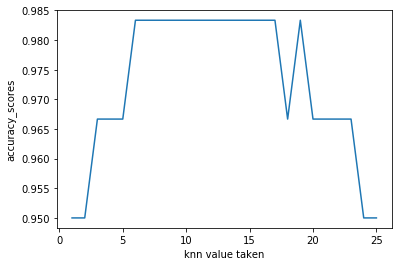

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel("knn value taken")
plt.ylabel("accuracy_scores")
plt.show()